# HW5: Image classification with Convolutional Neural Networks (20 points)

For this assignment, you'll build simple convolutional neural networks using Keras for image classification tasks. The goal is to get you familiar with the steps of working with deep learning models, namely, preprocessing dataset, defining models, train/test models and quantatively comparing performances.
Make sure this notebook is launched in an environment with Numpy, Tensorflow, matplotlib and Keras installed. Refer
to: https://www.tutorialspoint.com/keras/keras_installation.htm if you need help with creating a virtual environment with all required dependencies.

Furthermore, you can refer to the official Keras website for detailed documentations about different neural network layers (https://keras.io/api/layers/) and other classes.

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
import numpy as np

## (1) Sample code (5 points)

As in class, we first download the MNIST dataset and get the train/test sets. We then process the data to be ready for training and testing.

In [ ]:
# loading the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def process_dataset(trainX, trainY, testX, testY):
    # reshape features and normalize
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    trainX = trainX / 255.0
    testX = testX / 255.0
    # converting labels to one-hot encoding
    trainY = np_utils.to_categorical(trainY)
    testY = np_utils.to_categorical(testY)
    return trainX, trainY, testX, testY
trainX, trainY, testX, testY = process_dataset(trainX, trainY, testX, testY)

We then define the model. Similar to in-class demo, this model has 1 convolution layer with 32 filters, followed by one
 2-by-2 MaxPooling layer. The output from MaxPooling layer is then flattened and goes through two linear layers, with 100 and 10 hidden
units respectively. We use Stochastic Gradient Descent as our optimizer, and we can adjust its learning rate.

In [ ]:
def define_model(learning_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Now we can train and evaulate the specified model. Here we're using the test set as the validation set for simplicity.
However, to be more rigorous we often split the training dataset into train/validation sets and tune the hyperparameters using
only the training dataset, and we test the model on the test set after figuring out the best hyperparameters.

In [ ]:
# here we define a model with lr=0.01
model = define_model(0.01)
history = model.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.4506 - accuracy: 0.8748 - val_loss: 0.2275 - val_accuracy: 0.9313
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2098 - accuracy: 0.9368 - val_loss: 0.1616 - val_accuracy: 0.9511
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1582 - accuracy: 0.9525 - val_loss: 0.1393 - val_accuracy: 0.9570
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1296 - accuracy: 0.9611 - val_loss: 0.1213 - val_accuracy: 0.9635
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1109 - accuracy: 0.9671 - val_loss: 0.1016 - val_accuracy: 0.9679
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0969 - accuracy: 0.9709 - val_loss: 0.0910 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0868 - accuracy: 0.9738 - val_loss: 0.0814 -

Once training is completed, we can plot the train/validation losses and train/validation accuracies.

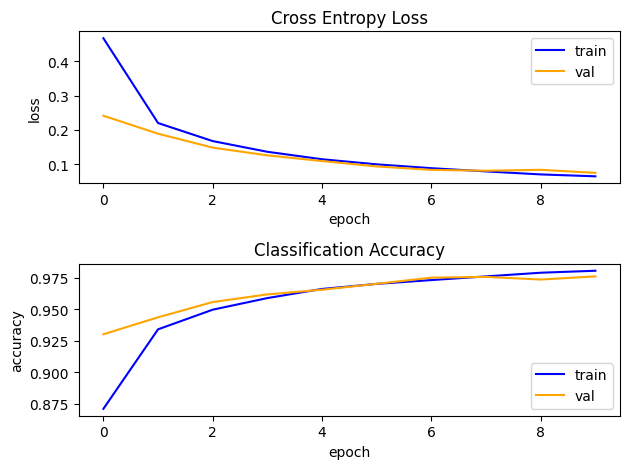

In [ ]:
#plot loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('loss')

# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
fig.tight_layout()
plt.show()

### Question 1 (5 points):

What do you observe in the above plots? What do you think might be the reason?

#### Your Answer

We observe the training and validation loss along with the training and validation accuracy over the epochs. The training loss decreases steadily, showing that the model is learning and improving its predictions on the training data. The validation loss plateaus after a few epochs as we can see, which could be because the model's performance on unseen validation data isn't improving enough. The training accuracy shows a steady increase, while the validation accuracy reaches a sat. point. These altogether suggest that the model may be overfitting the training data. We can address this w reg. techniques.

## (2) Vary learning rates (5 points)

Recall from lecture that we update the weights of the neural network by first calculate the gradients with backpropagation from the loss $L$, then update the weights by $$ w = w - \eta*\frac{\partial L}{\partial w}$$
Here, $\eta$ is the learning rate and decides the step size of updates. Previously we used $\eta=0.01$. We want to see the effect of learning rate on the training process, therefore we would like to try two other choices of $\eta$. (1) $\eta=1$ (2) $\eta=$1e-5 (0.00001)

In [ ]:
#### TODO 1 STARTS ###
model_eta_large = define_model(1)
history_eta_large = model_eta_large.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 1 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3113 - accuracy: 0.1054 - val_loss: 2.3050 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 2.3090 - accuracy: 0.1032 - val_loss: 2.3057 - val_accuracy: 0.1032
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.3085 - accuracy: 0.1049 - val_loss: 2.3101 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3085 - accuracy: 0.1041 - val_loss: 2.3070 - val_accuracy: 0.1028
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3088 - accuracy: 0.1030 - val_loss: 2.3137 - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 2.3086 - accuracy: 0.1047 - val_loss: 2.3049 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3082 - accuracy: 0.1047 - val_loss: 2.3085 -

In [ ]:
#### TODO 2 STARTS ###
model_eta_small = define_model(1e-5)
history_eta_small = model_eta_small.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 2 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.2819 - accuracy: 0.1615 - val_loss: 2.2768 - val_accuracy: 0.1666
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.2764 - accuracy: 0.1742 - val_loss: 2.2713 - val_accuracy: 0.1801
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.2709 - accuracy: 0.1870 - val_loss: 2.2657 - val_accuracy: 0.1920
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 2.2653 - accuracy: 0.1994 - val_loss: 2.2601 - val_accuracy: 0.2065
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.2598 - accuracy: 0.2125 - val_loss: 2.2544 - val_accuracy: 0.2208
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.2541 - accuracy: 0.2253 - val_loss: 2.2487 - val_accuracy: 0.2361
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.2484 - accuracy: 0.2381 - val_loss: 2.2428 -

We now compare the training accuracy of the two above models with the training accuracy of the model in part 1.

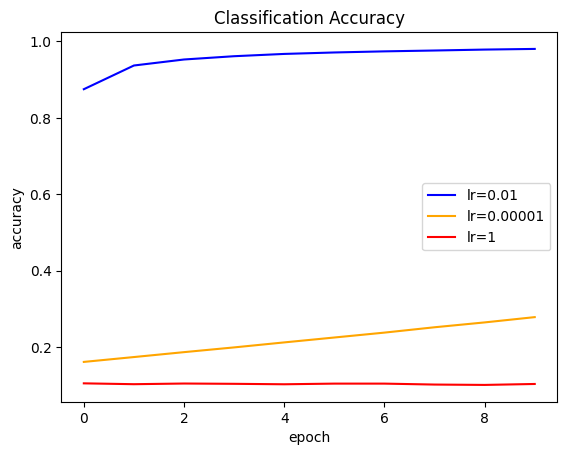

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_eta_small.history['accuracy'], color='orange')
plt.plot(history_eta_large.history['accuracy'], color='red')
plt.legend(('lr=0.01','lr=0.00001','lr=1'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 2 (5 points):

What do you observe by looking at the training accuracies above? Does the two other models with small and large learning
rates seem to be learning? What do you think might be the reason? (optional) Can you find a better learning rate than the baseline?

#### Your Answer

The model with a learning rate of 0.01 (baseline in pt. 1) reaches a value of approx. 0.98 which demonstrates consistent and substantial improvement in the training accuracy throughout epochs – learning with this learning rate. The model with learning rate 1 doesn’t show significant progress in learning, as it remains consistently low around 0.07-0.1; likely due to the large learning rate which causes unstable weight updates and prevents proper converging on an optimal solution for the model. The model with learning rate of 1e-5 can be seen to be improving slightly over time in a slower rate to the the baseline model as a result of the small learning rate leading to very small weight updates — slowing down the learning process. So all in all, while the baseline learning rate of 0.01 appears to be suitable for effective learning, further exploration through hyperparameter tuning techniques could potentially uncover an even better learning rate for the specific dataset and model architecture.

## (3) Adding momentum (5 points)

Till now we have tried various learning rates with SGD. There are various ways to make SGD behave more intelligently,
one of which is momentum. Intuitively, when SGD tries to descend down a valley (an analogy for the case
where the gradient of one dimension is larger than gradient of another dimension), SGD might bounce between the walls of the valley instead of descending along the valley. This makes SGD converge slower or even stuck. Momentum works by dampening the oscillations of SGD and encourages it to follow a smoother path. Formally, SGD with momentum update weights by the following way:

$$z^{k+1} = \beta z^{k} + \frac{\partial L}{\partial w^k}$$
$$w^{k+1} = w^{k} - \eta*z^{k+1}$$

Here $\beta$ is the momentum and is between 0 and 1. The official documentation of SGD details how to specify momentum (https://keras.io/api/optimizers/sgd/). If you want to learn more about momentum, this post might be helpful: https://distill.pub/2017/momentum/

Please define a model with learning rate 0.01 and momentum 0.9, then compare it to the baseline in part 1.

In [ ]:
def define_model_with_momentum(learning_rate,momentum):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #### TODO 3 STARTS ###
    opt = SGD(learning_rate=learning_rate, momentum=momentum)
    #### TODO 3 ENDS ###
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#### TODO 4 STARTS ###
model_momentum = define_model_with_momentum(0.01, 0.9)
history_momentum = model_momentum.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 4 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2341 - accuracy: 0.9288 - val_loss: 0.0915 - val_accuracy: 0.9708
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.0623 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0449 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0263 - accuracy: 0.9923 - val_loss: 0.0408 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.0460 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0390 -

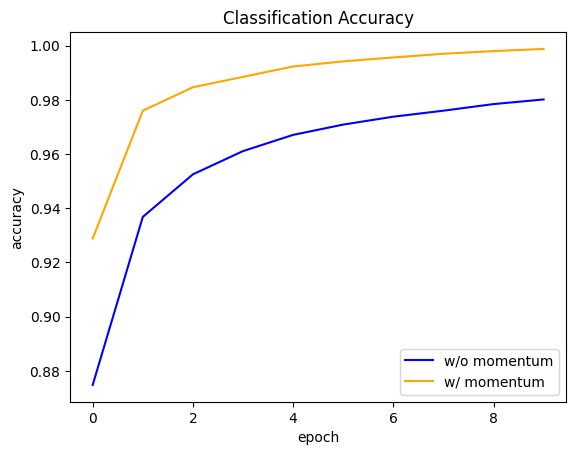

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_momentum.history['accuracy'], color='orange')
plt.legend(('w/o momentum','w/ momentum'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 3 (5 points):

What do you observe in the plot? Does momentum improves training?

#### Your Answer

The model with momentum shows clear improvement in training accuracy compared to the baseline model. Both models initially begin with similar accuracy values, but as the epochs progress, the model with momentum consistently outperformed the baseline model version. It even achieves a higher final accuracy, showing that it does in fact enhance the training process. The momentum factor helps dampen oscillations during gradient descent, allowing the model to follow a smoother path and converge to an optimal solution faster, allowing to learn better or more effectively, and with higher accuracy.


## (4) Adding convolution layers (5 points)

To increase model capacity (the ability to fit more complex dataset), one way is to adding layers to the model. In part
1, the model given to you has the following layers before the final 2 dense layers:
    
(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer

(2) Flatten layer

In the function below, please implement a model with the following layers (in this order):

(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer

(1) 2D convolution with 64 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer

(2) Flatten layer

In [ ]:
def define_model_2_conv(learning_rate):
    model = Sequential()
    #### TODO 5 STARTS ###
    # adding layers here
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    #### TODO 5 ENDS ###
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# define model and train
#### TODO 6 STARTS ###
model_2_layer = define_model_2_conv(0.01)
history_2_layer = model_2_layer.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 6 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4885 - accuracy: 0.8560 - val_loss: 0.1604 - val_accuracy: 0.9532
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1359 - accuracy: 0.9585 - val_loss: 0.0977 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0974 - accuracy: 0.9707 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0783 - accuracy: 0.9761 - val_loss: 0.0604 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0672 - accuracy: 0.9790 - val_loss: 0.0583 - val_accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.0529 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.0518 -

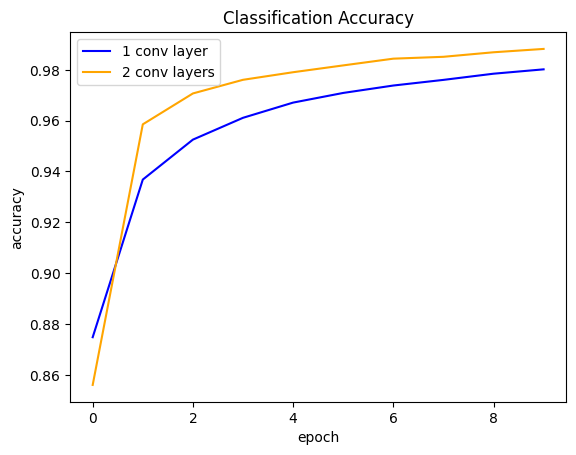

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_2_layer.history['accuracy'], color='orange')
plt.legend(('1 conv layer','2 conv layers'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 4 (5 points):

What do you observe in the plot? Does adding a covolutional layer improves training set accuracy? What might be
the reason to the improvement if there are any?

#### Your Answer

The model with 2 convolutional layers shows higher training set accuracy in comparison to the model with just 1 layer, and is seen to outperform the model with 1 layer.  The increased capacity and ability to capture more intricate features from the input images is what makes its performance improve. An additional convolutional layer, also allows the model to gain a deeper representation learning capability, allowing it to extract more complex and abstract patterns from the data. As a result, it’s not a surprise that the model with two conv. layers has higher accuracy and is better in discriminating and classifying training data. The plot clearly denotes the positive impact of adding an extra convolutional layer on enhancing the model's capacity and improving training accuracy.